<a href="https://colab.research.google.com/github/JanakiRaman-2002/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

## Data


In [11]:
df = pd.read_csv('Reviews.csv')

In [ ]:
df.shape

In [69]:
df = df.head(100)

In [70]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [71]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

## Dumb EDA

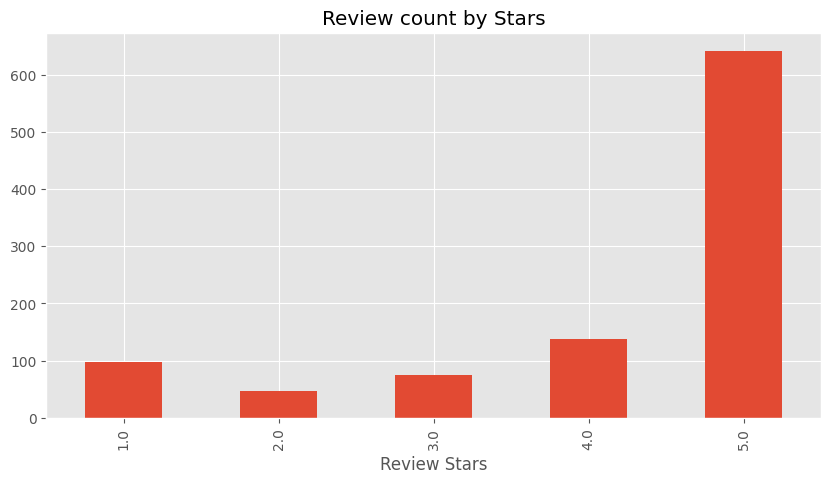

In [18]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Review count by Stars', figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [19]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

In [23]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [29]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

## VADER Sentiment Scoring


In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [73]:
sia.polarity_scores('I am not happy')

{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.4585}

In [74]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [75]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [76]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df, how='left')

In [77]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


### Vader Result Plot

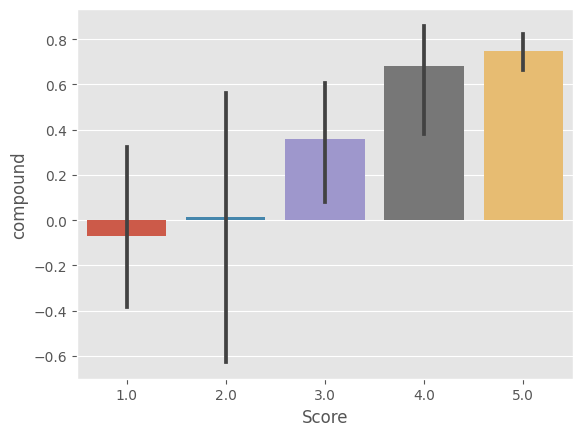

In [78]:
sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

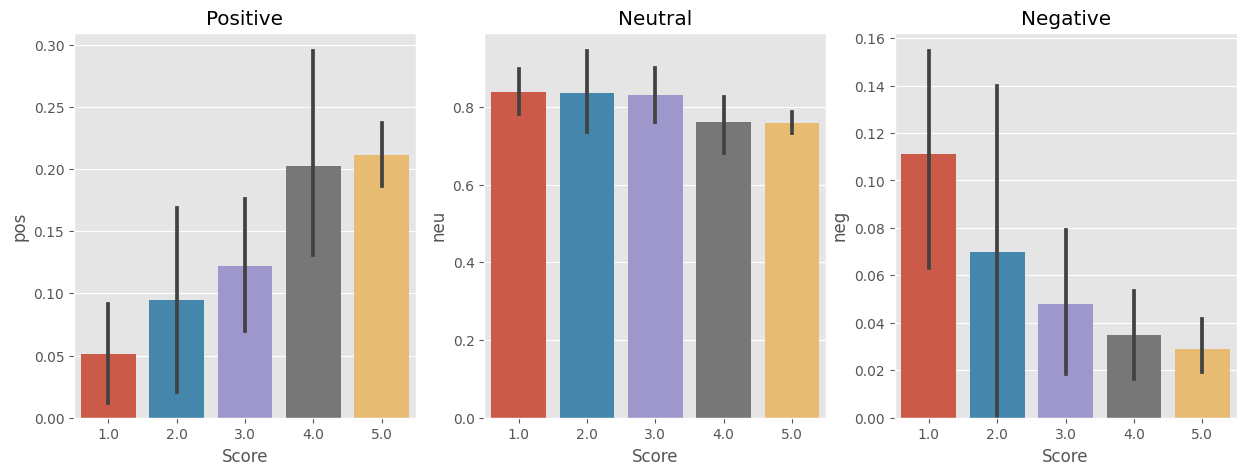

In [79]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

# Roberta Pretrained

In [ ]:
!pip install transformers

In [58]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [59]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

### Vader results on example

In [80]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

### Running Roberta

In [81]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_negative' : scores[0],
    'roberta_neutral' : scores[1],
    'roberta_positive' : scores[2]
}
scores_dict

{'roberta_negative': 0.97635514,
 'roberta_neutral': 0.020687476,
 'roberta_positive': 0.002957372}

In [82]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_negative' : scores[0],
      'roberta_neutral' : scores[1],
      'roberta_positive' : scores[2]
  }
  return scores_dict

In [83]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result, **roberta_result}
    res[myid] = both
  except RuntimeError:
    print(f'Broke for id {myid}')


  0%|          | 0/100 [00:00<?, ?it/s]

Broke for id 83


In [84]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df, how='left')

In [86]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


## Compare Models

In [87]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_negative',
       'roberta_neutral', 'roberta_positive', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

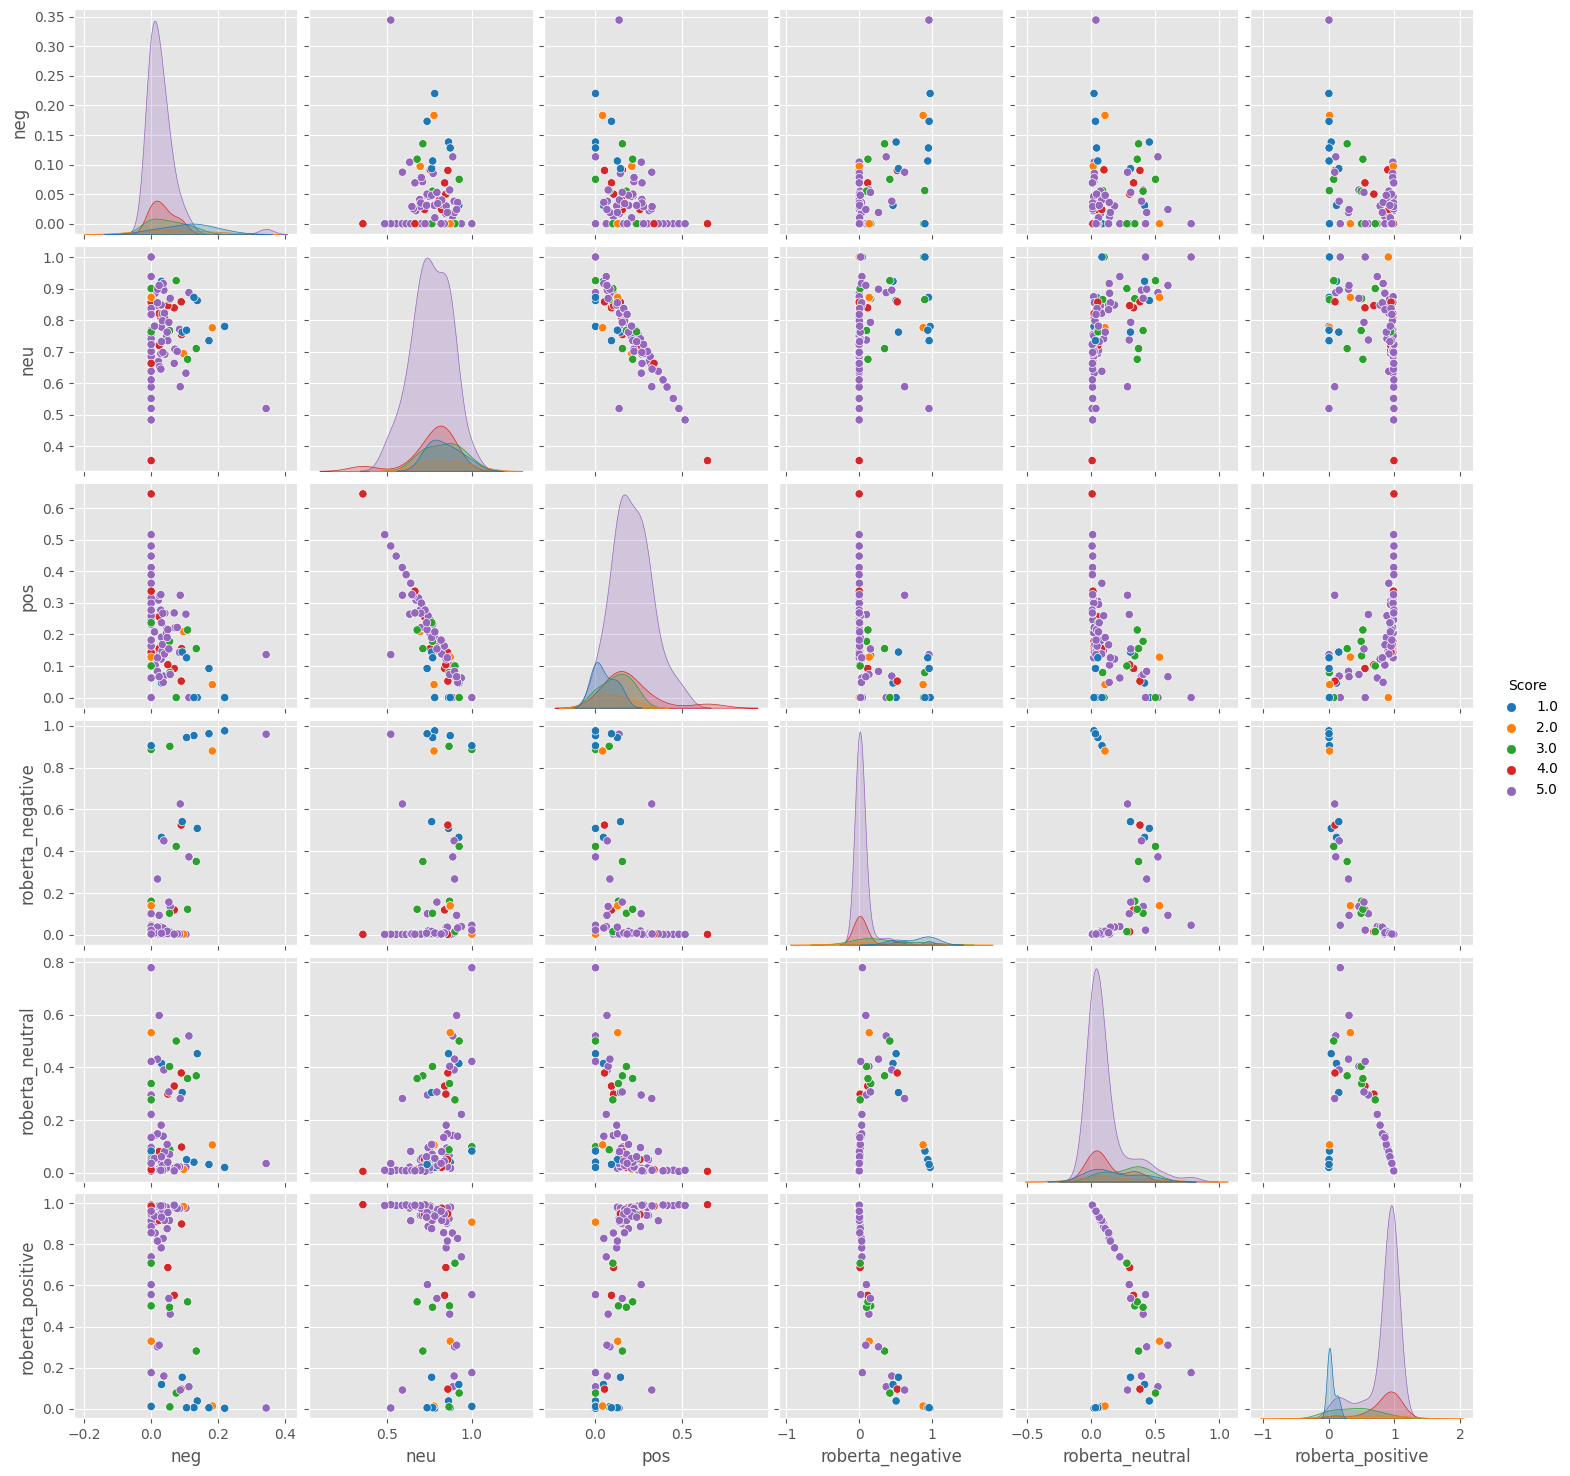

In [89]:
sns.pairplot(data=results_df, vars=['neg', 'neu', 'pos', 'roberta_negative',
       'roberta_neutral', 'roberta_positive'],hue='Score',palette='tab10')
plt.show()

# Errors

In [91]:
results_df.query('Score == 1').sort_values('roberta_positive', ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

In [92]:
results_df.query('Score == 1').sort_values('pos', ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

In [93]:
results_df.query('Score == 5').sort_values('roberta_negative', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [94]:
results_df.query('Score == 5').sort_values('neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Transformers Pipeline - Huggingface

In [96]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [97]:
sent_pipeline('I love chocolates!')

[{'label': 'POSITIVE', 'score': 0.9998685121536255}]

In [98]:
sent_pipeline('Boo')

[{'label': 'NEGATIVE', 'score': 0.9715902209281921}]